In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name

In [7]:
kobe_id = find_players_by_full_name("Kobe Bryant")[0]['id']

In [8]:
data_frame = ShotChartDetail(team_id=0, player_id=kobe_id, season_type_all_star="Regular Season", context_measure_simple="FGA")

In [16]:
data_frame = data_frame.get_data_frames()[0]

In [9]:
import random
from matplotlib.patches import Circle, Rectangle, Arc

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, background_color="#EBEBE8", outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.13, theta2=157.87, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [10]:
seasons = list(range(1996, 2015))

In [11]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

In [13]:
from matplotlib.animation import FuncAnimation

In [14]:
plt.style.use('fivethirtyeight')

In [23]:
import time
data_frames = []

for year in seasons:
    season = f"{str(year)}-{str(year+1)[-2:]}"
    shotchart_detail = ShotChartDetail(team_id=0, player_id=kobe_id, season_nullable=season, context_measure_simple='FGA')
    time.sleep(0.5)
    print(season)
    curr_df = shotchart_detail.get_data_frames()[0]
    curr_df.loc[:, 'SEASON'] = season
    
    data_frames.append(curr_df)

data_frame = pd.concat(data_frames)

1996-97
1997-98
1998-99
1999-00
2000-01
2001-02
2002-03
2003-04
2004-05
2005-06
2006-07
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15


In [25]:
from matplotlib.lines import Line2D


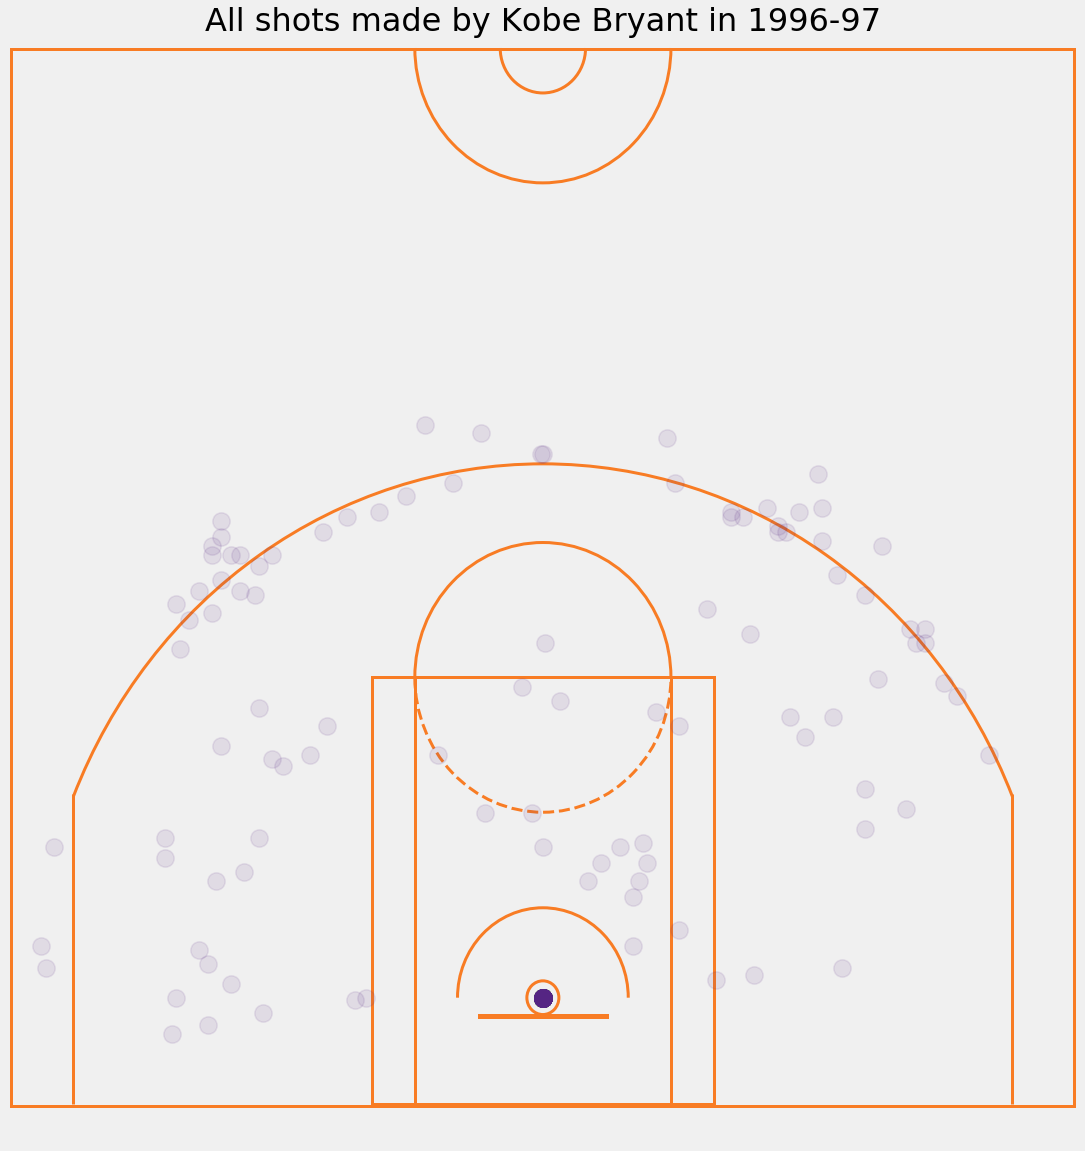

In [39]:
fig, ax = plt.subplots(figsize=(16, 16))
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)

string_seasons = []
for year in seasons:
    string_seasons.append(f"{str(year)}-{str(year+1)[-2:]}")

def plot_shot_chart(frame):
    
    ax.clear()
    cream = '#552583'
    miss = '#FDB927'
    
    index = frame // 10
    mod = frame % 10
    
    i=0
    while i < index:
        curr_season = data_frame.loc[data_frame.SEASON == string_seasons[i]]
        #color = colors[i]
        made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]

        alpha=0.025
        paths = ax.scatter(
            x=made_shots.LOC_X,
            y=made_shots.LOC_Y,
            marker='o',
            c=cream,
            s=100,
            alpha=alpha,
            edgecolors=cream,
            linewidths=1.5
        )
        i+=1
    
    
    curr_season = data_frame.loc[data_frame.SEASON == string_seasons[index]]
    color = cream
    made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
    missed_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 0]
    
    alpha = (mod+1) * 0.1
    if mod > 4:
        alpha = 0.6 - (mod - 4) * 0.1  
        if index == len(string_seasons)-1:
            alpha = 0.5
    paths = ax.scatter(
        x=made_shots.LOC_X,
        y=made_shots.LOC_Y,
        marker='o',
        c=color,
        s=300,
        alpha=alpha,
        edgecolors=color,
        linewidths=1.5,
    )

    

    
    if mod >=8 and index < len(string_seasons)-1:
        curr_season = data_frame.loc[data_frame.SEASON == string_seasons[index+1]]
        made_shots = curr_season.loc[curr_season.SHOT_MADE_FLAG == 1]
        #color = colors[index+1]

        alpha=0.025
        paths = ax.scatter(
            x=made_shots.LOC_X,
            y=made_shots.LOC_Y,
            marker='o',
            c=color,
            s=200,
            alpha=alpha,
            edgecolors=color,
            linewidths=1.5
        )


    #plt.xticks(np.arange(-250, 251, 20))
    #plt.yticks(np.arange(-50, 490, 20))
    # Removing ticks
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.grid(False)

    # Title
    ax.set_title(f"All shots made by Kobe Bryant in {string_seasons[index]}", size=32)
    draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
    
    # Drawing court
    ax.set_xlim(-251,251)
    ax.set_ylim(-65,427)
    

fig.subplots_adjust(left=0.03, bottom=0, right=0.96, top=0.96, wspace=None, hspace=None)

animation = FuncAnimation(fig=fig, func=plot_shot_chart, frames=len(data_frames)*10, interval=125, repeat_delay=3000)
animation.save("kobe_shotchart.mp4", writer='imagemagick')


(-65, 427)

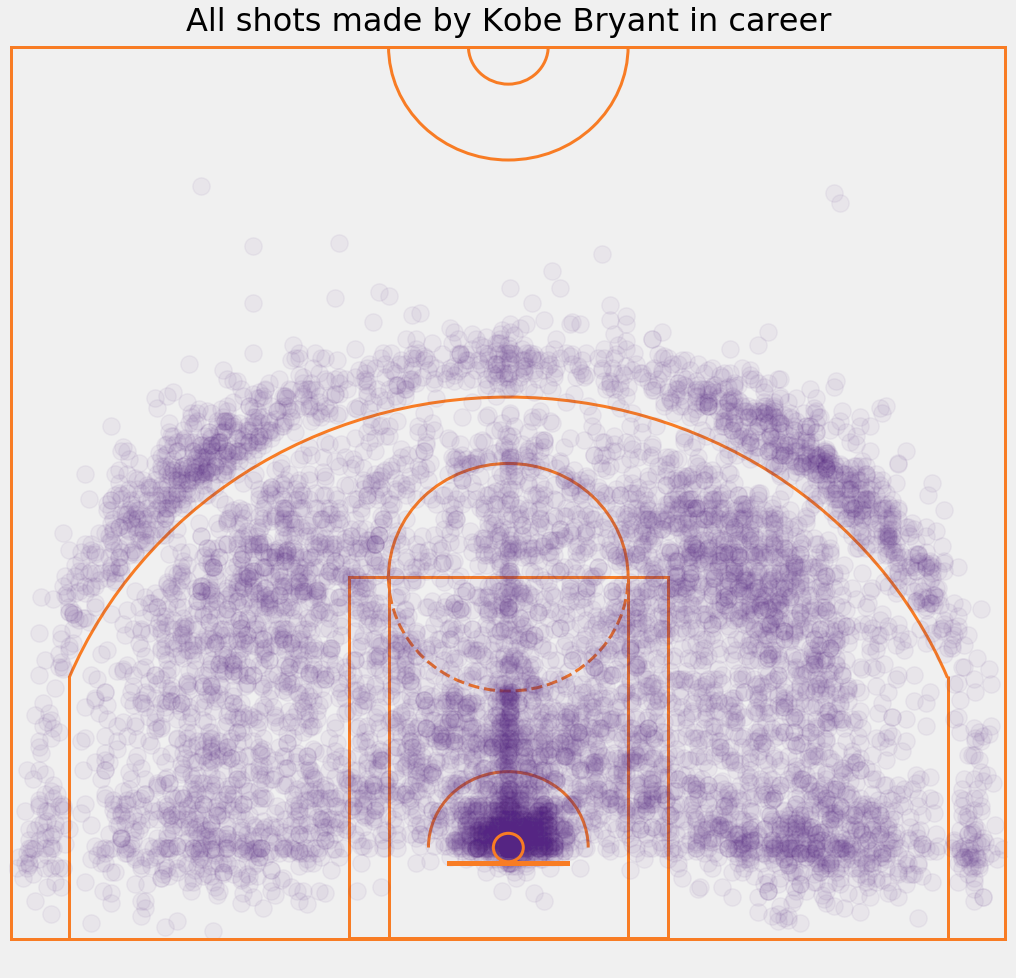

In [37]:
fig, ax = plt.subplots(figsize=(16, 16))

cream = '#552583'
miss = '#FDB927'


color = cream
made_shots = data_frame.loc[data_frame.SHOT_MADE_FLAG == 1]
missed_shots = data_frame.loc[data_frame.SHOT_MADE_FLAG == 0]

paths = ax.scatter(
    x=made_shots.LOC_X,
    y=made_shots.LOC_Y,
    marker='o',
    c=cream,
    s=300,
    alpha=0.05,
    #edgecolors=color,
    linewidths=1.5,
)

"""paths = ax.scatter(
    x=missed_shots.LOC_X,
    y=missed_shots.LOC_Y,
    marker='o',
    c=miss,
    s=250,
    alpha=0.25,
    edgecolors=miss,
    linewidths=1.0,
)"""


# Removing ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.grid(False)

# Title
ax.set_title(f"All shots made by Kobe Bryant in career", size=32)
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)

# Drawing court
ax.set_xlim(-251,251)
ax.set_ylim(-65,427)